In [48]:
#Objetivos
# patent number,
# date of patent, 
# patent title, 
# inventor name
# filed data.

In [2]:
from pytesseract import pytesseract
import matplotlib.pyplot as plt
import cv2
import re

In [3]:
class Image_patente():

    # Inicialização do Metodo
    def __init__(self, caminho_image):
        self.img = cv2.imread(caminho_image)
        
    # Plotar a Imagem
    def showImage(self):
        img_show = self.cutImage()
        img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        plt.imshow(img_show)
        return plt.show()
    
    # Capturar as cores da Imagem
    def getColor(self, x, y):
        return self.img.item(y, x, 0), self.img.item(y, x, 1), self.img.item(y, x, 2)

    # Modificar as cores da Imagem
    def setColor(self):
        self.img = cv2.cvtColor(self.img, cv2.COLOR_RGB2BGR)
        altura, largura, canais_de_cor = self.img.shape

        for y in range(0, altura):
            for x in range(0, largura):

                azul, verde, vermelho = getColor(self.img, x, y)
                #obj_img = setColor(obj_img, x, y, 0, 0, 0)
        self.showImage() 
    
    # Recortar apenas a parte utilizavel do arquivo
    def cutImage(self):
        altura, largura, canais_de_cor = self.img.shape

        altura_nova = int((altura/ 2) )
        largura_nova = int(largura)

        cut_img = self.img[0:altura_nova, 0: largura_nova]

        return cut_img

    # Retornar o arquivo da imagem em OpenCV recortado
    def Image(self):
        img_cut = self.cutImage()
        return img_cut

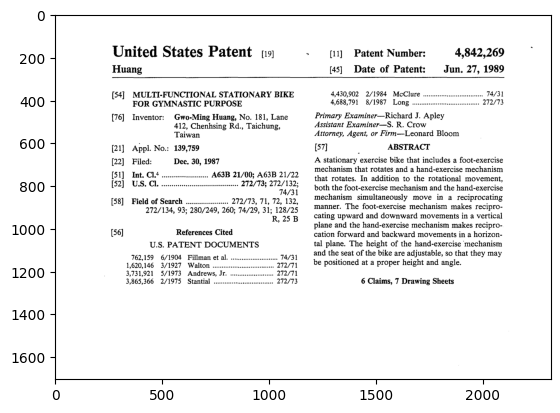

In [4]:
teste = Image_patente("Imagem_patentes/document-000-104213.in.000.png")
teste.showImage()

In [20]:
class OCR_Image():

    # Iniciando a Classe com a Imagem
    def __init__(self, img, lang= "eng"):
        self.strings = pytesseract.image_to_string(image= img, lang= lang)

    
    #Execução da classe retorando os valores procurados
    def main(self):
        texto_limpo = self.Filter()

        patent_number = self.encontrar_elemento("(?<=Patent Number:).+", texto_limpo)
        patent_date = self.encontrar_elemento("(?<=Date of Patent:).+", texto_limpo)
        patent_title = self.encontrar_elemento("(?<=Inventor:).+(?=,)", texto_limpo)
        inventor_name = self.encontrar_elemento("(?<=Inventor:).+(?=,)", texto_limpo)
        filed_data = self.encontrar_elemento("(?<=Filed:).+", texto_limpo)
    
        return patent_number, patent_date, patent_title, inventor_name, filed_data




    # Filtrando as linhas em Branco e dividindo em lista
    def Filter(self):
        self.strings = self.strings.split("\n")
        texto_limpo = []

        for linha in self.strings:
         if not linha.isspace() and len(linha) > 0:
            texto_limpo.append(linha)
        
        texto_limpo = texto_limpo
        return texto_limpo

    # Encontrando a palatra_chave por REGEX e retornando o resultado
    def encontrar_elemento(self, REGEX, texto_limpo):
        lista = texto_limpo
        for s in lista:
            match = re.findall(REGEX, s)
            if match != []:
                break
        
        return match

    # Metodo que apenas retona a imagem convertida em STRING
    def ImageString(self):
        return self.strings


In [21]:
imagem_limpa = Image_patente(caminho_image= "Imagem_patentes/document-000-104213.in.000.png").Image()

In [22]:
patent_number, patent_date, patent_title, inventor_name, filed_data = OCR_Image(imagem_limpa).main()

In [23]:
print(patent_number, patent_date, patent_title, inventor_name, filed_data)

[' 4,842,269'] [' Jun. 27, 1989'] [' Gwo-Ming Huang, No. 181'] [' Gwo-Ming Huang, No. 181'] [' Dee. 30, 1987']
